# THE COMMITTEE MACHINE

### Requirements:
- Python3
- Scipy, numpy, matplotlib, skmonaco

To install and upgrade the packages: (pip3 install --upgrade numpy scipy matplotlib scikit-monaco)

# Import modules and Functions

In [1]:
%matplotlib inline

import sys
sys.path.append('Python/')

from main import *

# AMP and State Evolution

\begin{equation}
Y_\mu = {\rm{sign}}\Big[\sum_{l=1}^K {\rm{sign}} \Big( \sum_{i=1}^nX_{\mu i}  W_{i l}^* \Big) \Big]\, . \label{model:com}
\end{equation}

## Parameters

- $K=2$ : Number of hidden units
- N $\in$ [1000-10000] : Size of each sample
- PW_choice = {binary,gaussian} : weights distribution
- alpha $\in [0.0-5.0]$ : $\alpha=\frac{M}{N}$
- verbose = {True,False} : to print intermediate results

In [2]:
N = 10000
PW_choice = 'binary'
alpha = 1.8
verbose = False

## State Evolution

The state evolution of the AMP algorithm is its assymptotic behaviour in the limit $ N\to \infty$ and averaged over many realization of the matrix $X$. The corresponding overlap $q$ and $R$ are given by the saddle point equations:
\begin{equation}
\label{main:StateEvolution}
	q_{\rm SE}^{t+1} = 2 \frac{\partial \psi_{P_0} }{\partial
          R}(R_{\rm SE}^t) \, ,	 \hspace{1cm}
	R_{\rm SE}^{t+1} = 2 \alpha \frac{\partial \Psi_{P_{\rm out}
          } }{\partial q}(q_{\rm SE}^t;\rho)\, .
\end{equation}

We implement a solver of the previous iterative equations: 

##### Run SE (Initilization loading backup to speed up the computation) 

In [3]:
obj_SE = run_SE(PW_choice=PW_choice,alpha=alpha,verbose=verbose)

Start initialization
Succeeded to load old objects :  Nearest alpha= 1.8
Successful initialization 

K= 2 PW= binary alpha= 1.8 channel= sign-sign
Start SE: Mon Jun 11 18:23:18 2018
Final overlap q_SE=
[0.45836988 0.24338854]
[0.24338854 0.45836988]
End SE


## Approximate Message Passing

##### Run AMP: training on M=alpha.N samples

In [5]:
obj_AMP = run_AMP(PW_choice=PW_choice,N=N,alpha=alpha,verbose=verbose)

Start initialization
Successful initialization 

K= 2 PW= binary alpha= 1.8
Start AMP: Mon Jun 11 18:40:16 2018
Final overlap: q_AMP=
[0.44539591 0.25409489]
[0.25409489 0.44500003]
End AMP


## AMP vs SE

##### Plot the evolution of $q_{AMP}^t$ and $q_{SE}^t$

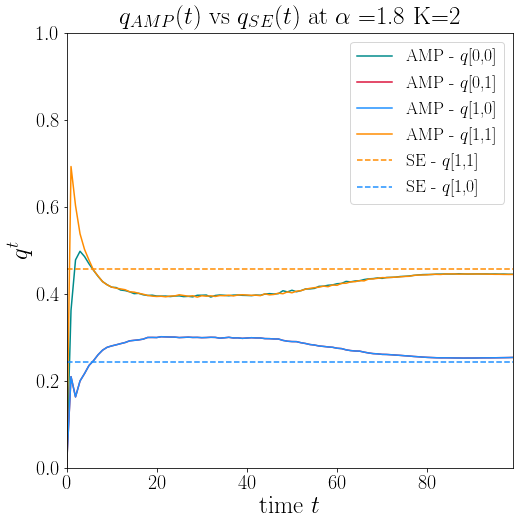

In [6]:
plot_q(obj_AMP,obj_SE)

We show the overlap matrix elements $q^t$ as a function of time $t$, for the committee machine with two hidden unites ($K=2$) at $\alpha =1.8$.

The full lines show the overlap matrix elements of the AMP algorithm for a single sample. The dashed lines show the assymptotic behaviour of the algorithm in the limit N $\to \infty$ and averaging over many samples. 

As illustrated, the overlap matrix of the AMP algorithm converges towards its state evolution overlap. 

## Generalization error

We then compute the generalization error of the state evolution prediction and compare it to the algothimic error averaged over N_samples_gen_error$=10000$ samples

#### 1. Compute SE generalization error

In [7]:
gen_error_SE = run_gen_error_SE(obj_SE)

alpha= 1.8 gen_err= 0.1350635


#### 2. AMP generalization error (over N_samples_gen_error new samples)

In [9]:
## Compute the corresponding Generalization Error
N_samples_gen_error = 10000
tab_gen_AMP = run_gen_error_AMP(obj_AMP,PW_choice,N,alpha,N_samples_gen_error)

Start Gen Error
0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
End Gen Error
Generalization Error = 0.13906510844647202


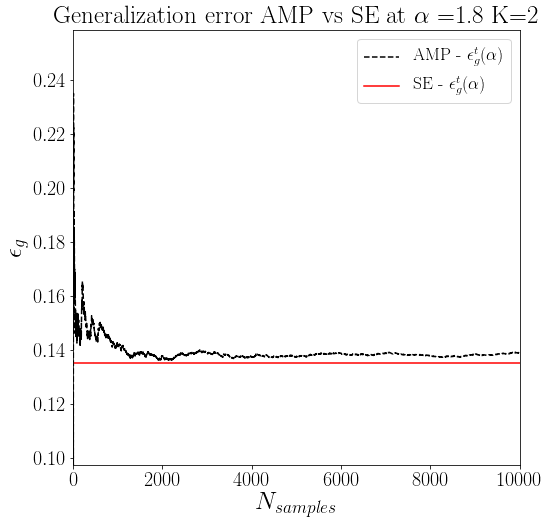

In [10]:
plot_gen_error(obj_AMP,tab_gen_AMP,gen_error_SE)